In [88]:
import numpy as np
import random

class RandomWalk:
    def __init__(self) -> None:
        self.state = 2
        pass
    
    def action_space(self):
        return 2
    
    def state_space(self):
        return 5
    
    def reset(self):
        self.state = 2
        return self.state
    
    def step(self, action):
        new_state = self.state + (-1 if action == 0 else 1)
        reward = 1 if new_state == 5 else 0
        terminated = new_state == -1 or new_state == 5
        self.state = 2 if terminated else new_state
        return terminated, reward, new_state
    
    
def td0_evaluating_state_values(env, num_episodes, alpha, gamma = 1.0, callback = None):
    num_states = env.state_space()
    num_actions = env.action_space()
    values = np.full(num_states,0.5,dtype=float)
    for episode in range(num_episodes):
        state = env.reset()
        while True:
            action = random.choice(range(num_actions))
            terminated, reward, new_state = env.step(action)
            v_prime = 0 if terminated else values[new_state]
            values[state] += (reward + gamma * v_prime - values[state]) * alpha
            state = new_state
            if terminated:
                break
        if callback:
            callback(values)
    return values



[0.5  0.5  0.5  0.5  0.55]
[0.5  0.5  0.5  0.5  0.55]
[0.5   0.5   0.5   0.505 0.595]
[0.45       0.50096023 0.50417879 0.5149827  0.57987827]
[0.40915124 0.49197367 0.50359623 0.5149827  0.57987827]
[0.40915124 0.4930197  0.50470529 0.52045581 0.62189045]
[0.37502946 0.47783951 0.50495428 0.51903827 0.62189045]
[0.37502946 0.48942008 0.50006649 0.53284573 0.65089478]
[0.33752652 0.47798102 0.50195198 0.5298956  0.65089478]
[0.33752652 0.47798102 0.50474634 0.54199551 0.6858053 ]
[0.33752652 0.4803899  0.50606238 0.56802509 0.70557618]
[0.45 0.5  0.5  0.5  0.5 ]
[0.405 0.495 0.5   0.5   0.5  ]
[0.405     0.4958145 0.4991855 0.5       0.55     ]
[0.405      0.4958145  0.49926695 0.505      0.595     ]
[0.3645     0.48673305 0.4989217  0.505      0.595     ]
[0.33803973 0.4702993  0.49284102 0.50408253 0.595     ]
[0.30423576 0.45707334 0.49058685 0.50408253 0.595     ]
[0.30423576 0.46493483 0.4867784  0.51047081 0.6355    ]
[0.27381218 0.45063425 0.48282471 0.51047081 0.6355    ]
[0.27

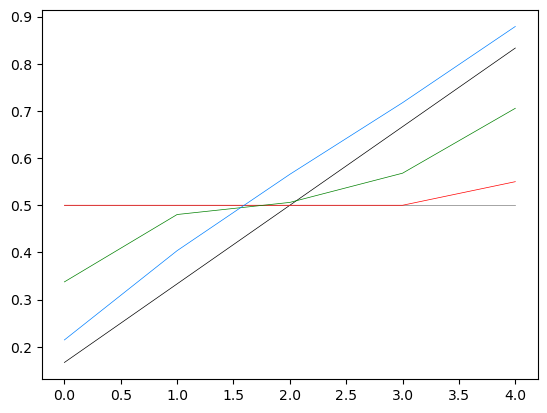

In [90]:
import matplotlib.pyplot as plt
env = RandomWalk()
num_states = env.state_space()
true_values = [float(n+1)/(num_states+1) for n in range(num_states)]
plt.plot(range(num_states), true_values, "#000000", linewidth = 0.5)

episodes=[0,1,10,100]
colors = ["#808080", "#FF0000", "#008000", "#0080FF"]
for n,c in zip(episodes,colors):
    values = td0_evaluating_state_values(env, n, 0.1)
    plt.plot(range(num_states), values, c, linewidth = 0.5)


